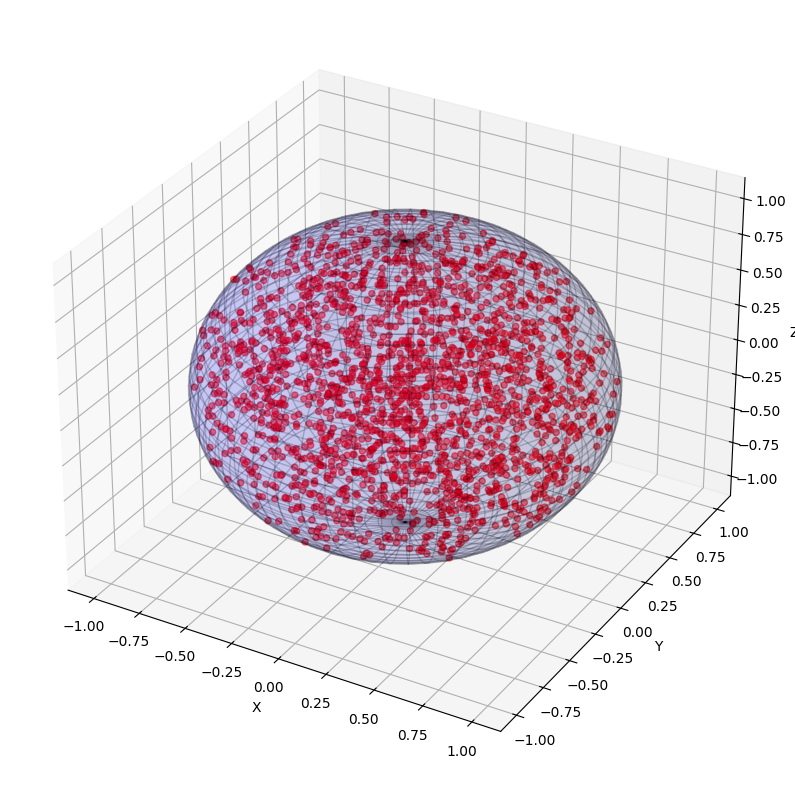

Momento de inercia eje x: 0.39907513403467076
Momento de inercia eje y: 0.4011124019124075
Momento de inercia eje z: 0.4005971600801067
Producto de inercia plano xy: -0.006633606804653841


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

def random_sequence(size, inf_lim, sup_lim, x0, a=25214903917, m=2**48, c=11):
    sequence = np.zeros(size, dtype=float)
    for i in range(size):
        x0 = (a * x0 + c) % m
        sequence[i] = x0
    sequence /= float(m)
    return inf_lim + (sup_lim - inf_lim) * sequence

def correlation(k, size):
    sequence = random_sequence(size, 0, 1, rnd.random())
    sum = 0
    for i in range(size - k):
        sum += sequence[i] * sequence[i + k]
    sum /= size
    return sum

def random_sphere(r, n_points):
    rho = random_sequence(n_points, 0, r, rnd.random())**(1/3)
    theta = random_sequence(n_points, 0, 1, rnd.random())
    phi = random_sequence(n_points, 0, 1, rnd.random())
    theta = 2 * np.pi * theta
    phi = np.arccos(2 * phi - 1)
    x = rho * np.cos(theta) * np.sin(phi)
    y = rho * np.sin(theta) * np.sin(phi)
    z = rho * np.cos(phi)
    return x, y, z

def true_sphere(r, n_lat, n_long):
    phi = np.linspace(0, np.pi, n_lat)
    theta = np.linspace(0, 2 * np.pi, n_long)
    phi, theta = np.meshgrid(phi, theta)
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    return x, y, z

x_random, y_random, z_random = random_sphere(1, 2000)
x_true, y_true, z_true = true_sphere(1, 50, 50)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_random, y_random, z_random, color="r", alpha=0.5, label="Random Points")
ax.plot_surface(x_true, y_true, z_true, color="b", alpha=0.1, edgecolor='k')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

def moment_of_inertia(axis, n_points, r):
    x, y, z = random_sphere(r, n_points)
    if axis == "x":
        integral = np.sum(y**2 + z**2)
    elif axis == "y":
        integral = np.sum(x**2 + z**2)
    else:
        integral = np.sum(x**2 + y**2)
    integral /= n_points
    return integral

def product_of_inertia(plane, n_points, r):
    x, y, z = random_sphere(r, n_points)
    if plane == "xy":
        integral = np.sum(x * y)
    elif plane == "yz":
        integral = np.sum(y * z)
    elif plane == "zx":
        integral = np.sum(z * x)
    integral /= n_points
    integral *= 4*np.pi/3
    
    return -integral

r = 1
n_points = 20000
I_x = moment_of_inertia("x", n_points, r)
I_y = moment_of_inertia("y", n_points, r)
I_z = moment_of_inertia("z", n_points, r)
product_xy = product_of_inertia("xy", n_points, r)

print(f"Momento de inercia eje x: {I_x}")
print(f"Momento de inercia eje y: {I_y}")
print(f"Momento de inercia eje z: {I_z}")
print(f"Producto de inercia plano xy: {product_xy}")
